# EDA and Baseline Models

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from load_data import load
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [8]:
df = load(zhvi_years=[2023], zori_years=[2023], sale_listings_years=[2023], sales_years=[2023], days_on_market_years=[2023],
          new_cons_years=[2023])

In [9]:
df.head()

RegionID  SizeRankZip  RegionName RegionType State         City  \
0     91982            1       77494        zip    TX         Katy   
1     91940            3       77449        zip    TX         Katy   
2     91733            5       77084        zip    TX      Houston   
3     91926           11       77433        zip    TX      Cypress   
4     92036           25       77573        zip    TX  League City   

                                  Metro        CountyName      ZHVI 2023  \
0  Houston-The Woodlands-Sugar Land, TX  Fort Bend County  473309.572520   
1  Houston-The Woodlands-Sugar Land, TX     Harris County  276410.405397   
2  Houston-The Woodlands-Sugar Land, TX     Harris County  269296.564130   
3  Houston-The Woodlands-Sugar Land, TX     Harris County  423596.917469   
4  Houston-The Woodlands-Sugar Land, TX  Galveston County  369596.437820   

  ZHVF BaseDate  ...  Transit Jobs  Transit Trips/Week  Transit Routes  \
0    2024-01-31  ...            56                  40             0.0   
1    2024-01-31  ...            56                  40             0.0   
2    2024-01-31  ...       218,774               1,900             5.0   
3    2024-01-31  ...           NaN                 NaN             NaN   
4    2024-01-31  ...           NaN                 NaN             NaN   

   Transit Shed (sq mi)  Transit percentage  Population  Unnamed: 0  STATEFP  \
0                   0.0               0.013      24,783     38085.0     48.0   
1                   0.0               0.013      24,783     38107.0     48.0   
2                  31.0               0.039   2,439,835     38107.0     48.0   
3                   NaN                 NaN         NaN     38107.0     48.0   
4                   NaN                 NaN         NaN     38090.0     48.0   

   COUNTYFP  NatWalkInd  
0     157.0    7.968900  
1     201.0   11.430193  
2     201.0   11.430193  
3     201.0   11.430193  
4     167.0    7.878866  

[5 rows x 32 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124315 entries, 0 to 124314
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RegionID               124315 non-null  int64  
 1   SizeRankZip            124315 non-null  int64  
 2   RegionName             124315 non-null  int64  
 3   RegionType             124315 non-null  object 
 4   State                  124315 non-null  object 
 5   City                   115971 non-null  object 
 6   Metro                  7716 non-null    object 
 7   CountyName             124315 non-null  object 
 8   ZHVI 2023              123336 non-null  float64
 9   ZHVF BaseDate          8963 non-null    object 
 10  ZHVF 2024-02-29        8963 non-null    float64
 11  ZHVF 2024-04-30        8963 non-null    float64
 12  ZHVF 2025-01-31        8963 non-null    float64
 13  ZORI 2023              3475 non-null    float64
 14  SizeRankMSA            124315 non-nu

In [11]:
df = df.dropna(subset=['ZORI 2023', 'Sales 2023', 'Transit Score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2797 entries, 0 to 7517
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               2797 non-null   int64  
 1   SizeRankZip            2797 non-null   int64  
 2   RegionName             2797 non-null   int64  
 3   RegionType             2797 non-null   object 
 4   State                  2797 non-null   object 
 5   City                   2797 non-null   object 
 6   Metro                  2797 non-null   object 
 7   CountyName             2797 non-null   object 
 8   ZHVI 2023              2788 non-null   float64
 9   ZHVF BaseDate          2788 non-null   object 
 10  ZHVF 2024-02-29        2788 non-null   float64
 11  ZHVF 2024-04-30        2788 non-null   float64
 12  ZHVF 2025-01-31        2788 non-null   float64
 13  ZORI 2023              2797 non-null   float64
 14  SizeRankMSA            2797 non-null   int64  
 15  Sale List

In [22]:
df = df.dropna(subset=['NatWalkInd', 'ZHVF BaseDate', 'New Construction 2023'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2683 entries, 0 to 7517
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               2683 non-null   int64  
 1   SizeRankZip            2683 non-null   int64  
 2   RegionName             2683 non-null   int64  
 3   RegionType             2683 non-null   object 
 4   State                  2683 non-null   object 
 5   City                   2683 non-null   object 
 6   Metro                  2683 non-null   object 
 7   CountyName             2683 non-null   object 
 8   ZHVI 2023              2683 non-null   float64
 9   ZHVF BaseDate          2683 non-null   object 
 10  ZHVF 2024-02-29        2683 non-null   float64
 11  ZHVF 2024-04-30        2683 non-null   float64
 12  ZHVF 2025-01-31        2683 non-null   float64
 13  ZORI 2023              2683 non-null   float64
 14  SizeRankMSA            2683 non-null   int64  
 15  Sale List

In [25]:
base_df = df[['ZHVI 2023', 'ZHVF 2025-01-31', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023',
              'New Construction 2023', 'Transit Score', 'NatWalkInd']]

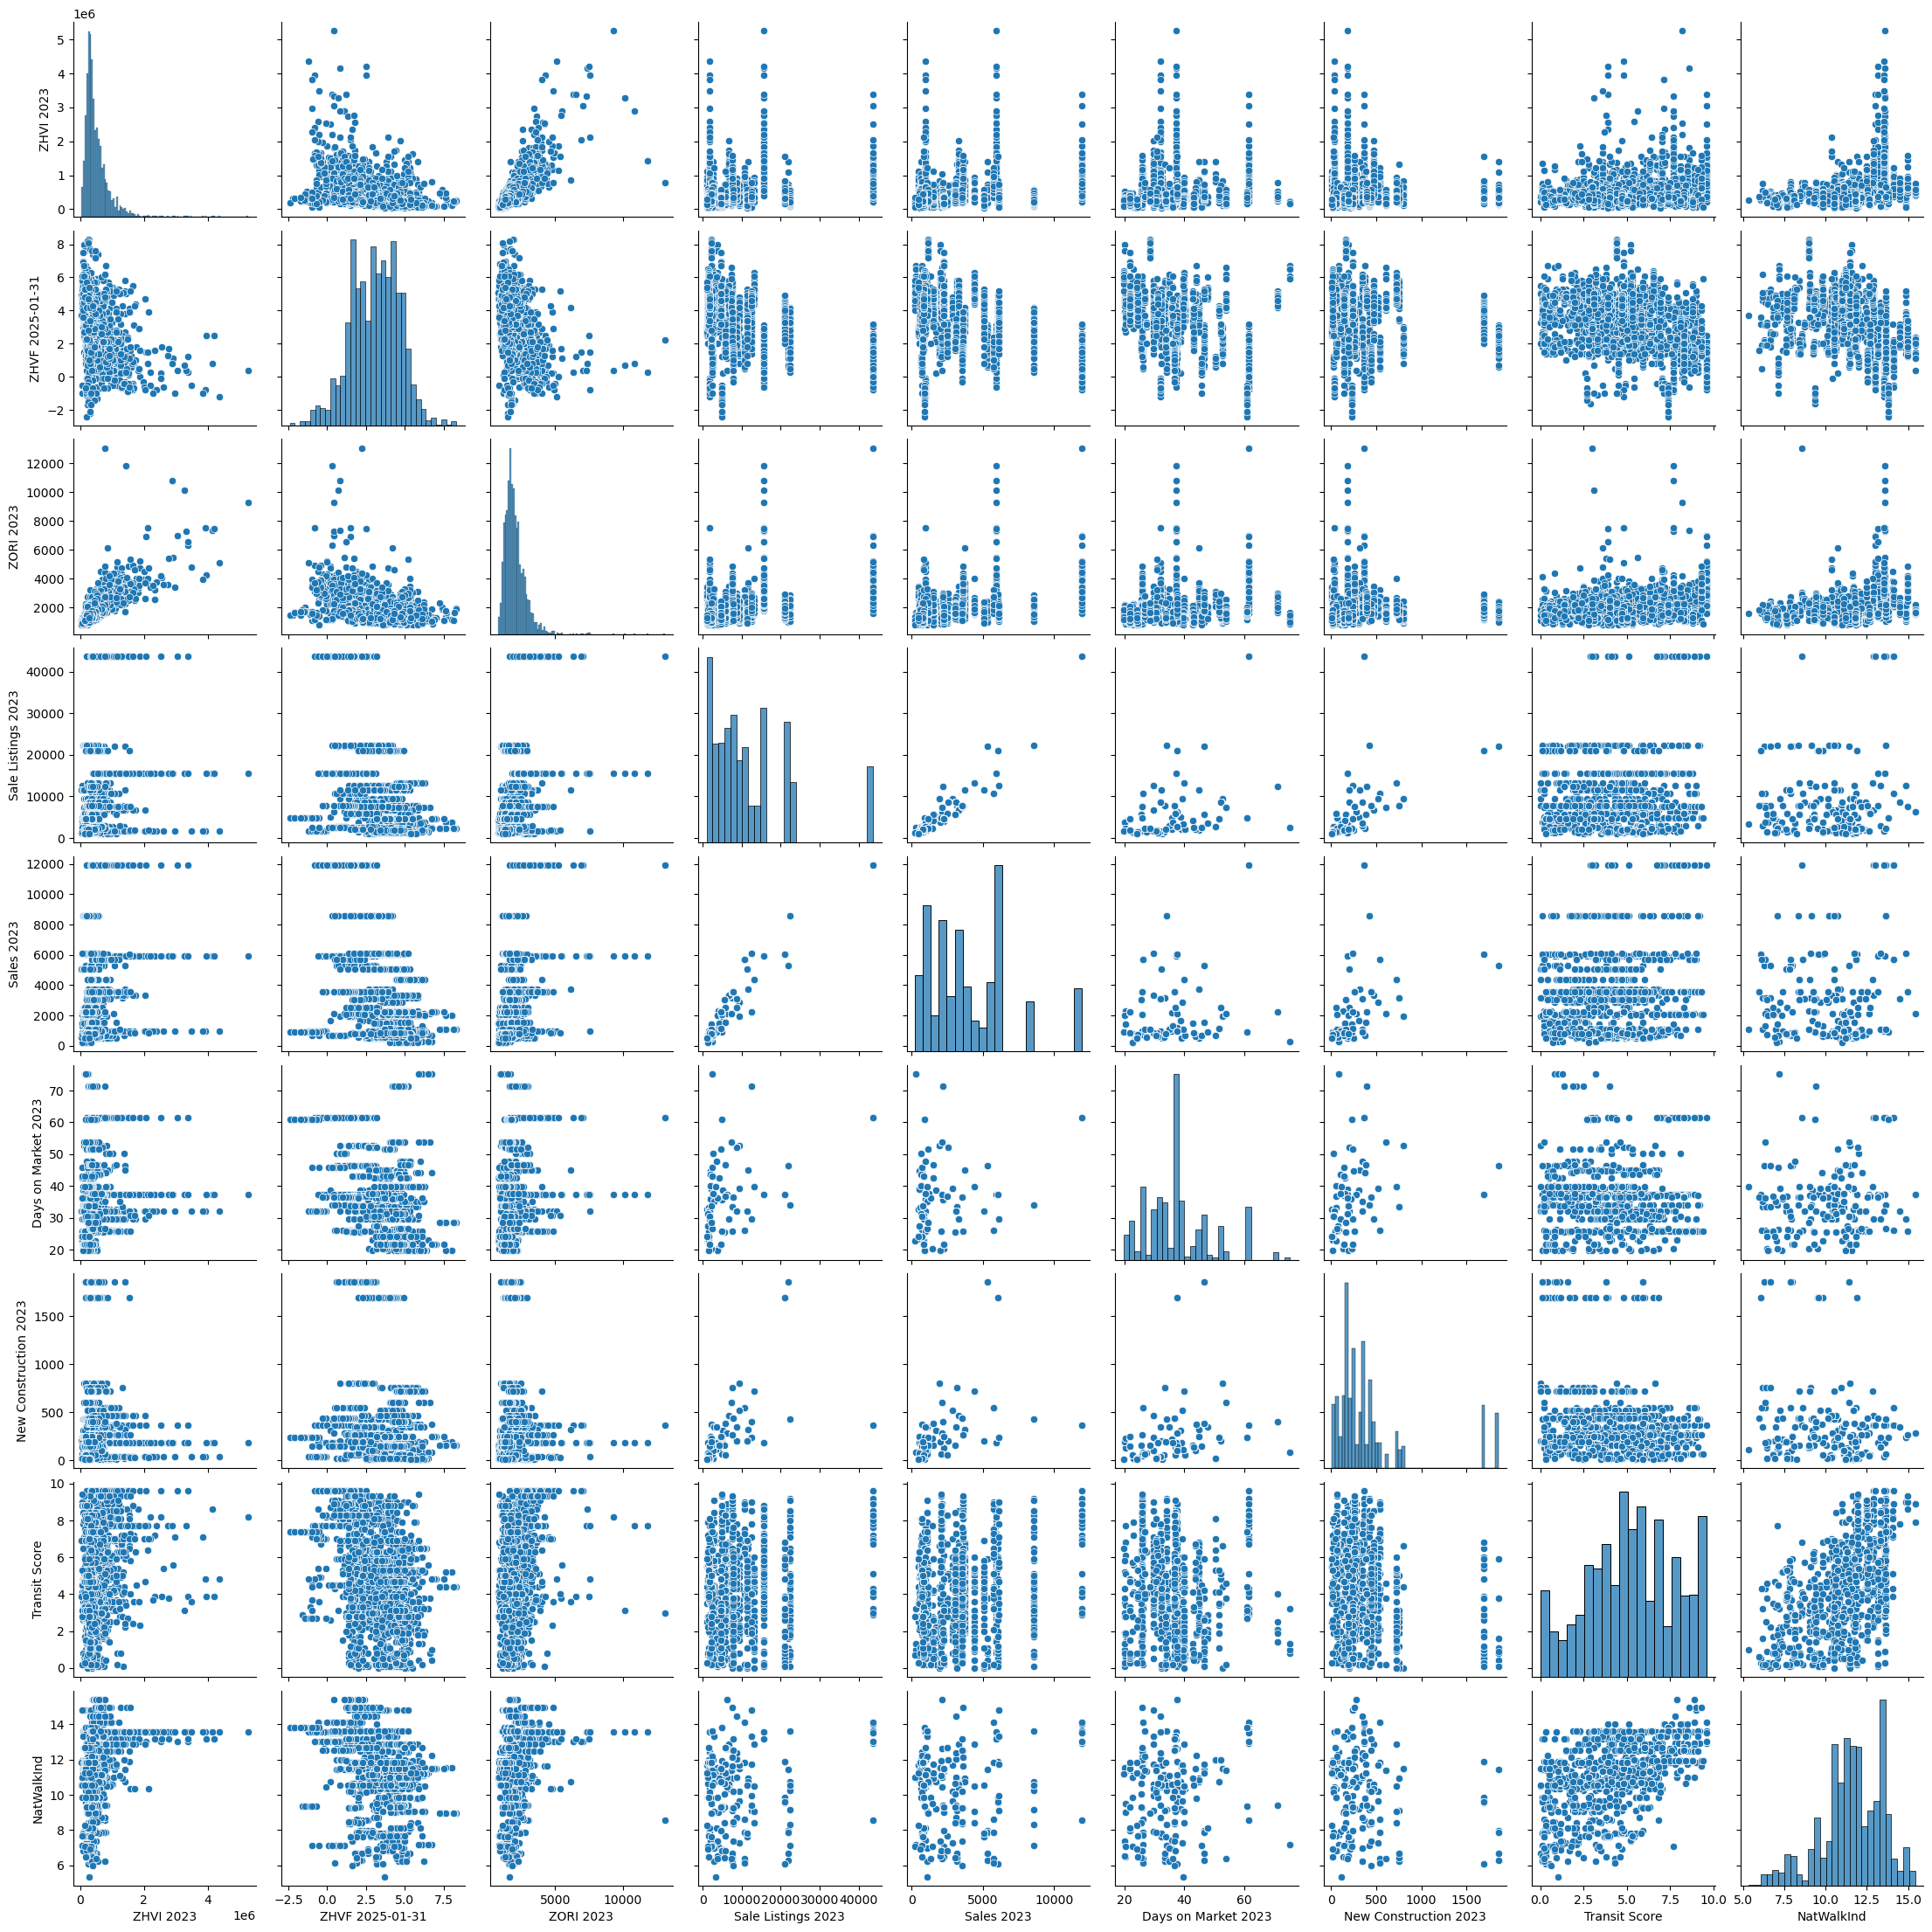

In [19]:
sns.pairplot(data=base_df)

In [26]:
scaler = StandardScaler()
base_df = scaler.fit_transform(base_df)
#base_df = normalize(base_df)

## GMM

In [27]:
labels = []
bics = []
sils = []
for x in range(2, 10):
    gmm = GaussianMixture(n_components=x, random_state=100)
    gmm.fit(base_df)
    clusters = gmm.predict(base_df)
    bic = gmm.bic(base_df)
    sil = silhouette_score(base_df, clusters)
    labels.append(clusters)
    bics.append(bic)
    sils.append(sil)
    print('#Clusters - ' + str(x))
    print('BIC - ' + str(bic))
    print('Silhouette Score - ' + str(sil))
    print('='*20 + '\n')

#Clusters - 2
BIC - 36482.23281562691
Silhouette Score - 0.27499147514297817

#Clusters - 3
BIC - 31338.385191537905
Silhouette Score - 0.22857609873493706

#Clusters - 4
BIC - 12436.850330137697
Silhouette Score - 0.2125657174938718

#Clusters - 5
BIC - 10616.382221046359
Silhouette Score - 0.19879480300026928

#Clusters - 6
BIC - 3732.5257728087863
Silhouette Score - 0.2165803330662478

#Clusters - 7
BIC - 4054.1758022786053
Silhouette Score - 0.21434092362323126

#Clusters - 8
BIC - -324.8048952680424
Silhouette Score - 0.21254670909427612

#Clusters - 9
BIC - -2466.9563814736666
Silhouette Score - 0.19825244655733534



Text(0, 0.5, 'BIC')

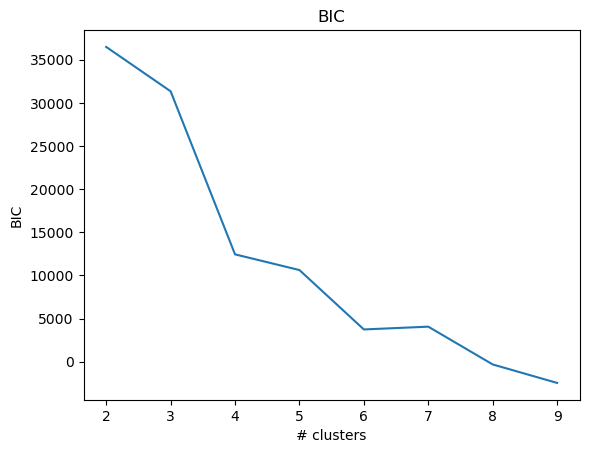

In [28]:
bic_plot = sns.lineplot(x=[x for x in range(2,10)], y=bics)
bic_plot.set_title('BIC')
bic_plot.set_xlabel('# clusters')
bic_plot.set_ylabel('BIC')

Text(0, 0.5, 'Silhouette Score')

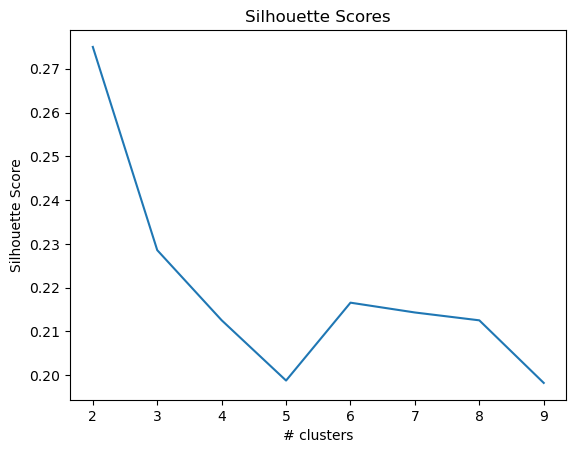

In [29]:
sil_plot = sns.lineplot(x=[x for x in range(2, 10)], y=sils)
sil_plot.set_title('Silhouette Scores')
sil_plot.set_xlabel('# clusters')
sil_plot.set_ylabel('Silhouette Score')

In [32]:
for x in range(2, 10):
    df[(str(x) + ' clusters')] = labels[x-2]
df.head()

/var/folders/c_/ynsptx7j24g493qs8vwm6rh40000gn/T/ipykernel_1604/1496491740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(str(x) + ' clusters')] = labels[x-2]
/var/folders/c_/ynsptx7j24g493qs8vwm6rh40000gn/T/ipykernel_1604/1496491740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(str(x) + ' clusters')] = labels[x-2]
/var/folders/c_/ynsptx7j24g493qs8vwm6rh40000gn/T/ipykernel_1604/1496491740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

RegionID  SizeRankZip  RegionName RegionType State      City  \
0     91982            1       77494        zip    TX      Katy   
1     91940            3       77449        zip    TX      Katy   
2     91733            5       77084        zip    TX   Houston   
7     92045           75       77584        zip    TX  Pearland   
8     91889           88       77379        zip    TX    Spring   

                                  Metro        CountyName      ZHVI 2023  \
0  Houston-The Woodlands-Sugar Land, TX  Fort Bend County  473309.572520   
1  Houston-The Woodlands-Sugar Land, TX     Harris County  276410.405397   
2  Houston-The Woodlands-Sugar Land, TX     Harris County  269296.564130   
7  Houston-The Woodlands-Sugar Land, TX   Brazoria County  368646.998329   
8  Houston-The Woodlands-Sugar Land, TX     Harris County  358282.617576   

  ZHVF BaseDate  ...  COUNTYFP  NatWalkInd  2 clusters  3 clusters  \
0    2024-01-31  ...     157.0    7.968900           1           0   
1    2024-01-31  ...     201.0   11.430193           1           0   
2    2024-01-31  ...     201.0   11.430193           1           0   
7    2024-01-31  ...      39.0    6.298689           1           0   
8    2024-01-31  ...     201.0   11.430193           1           0   

   4 clusters  5 clusters  6 clusters  7 clusters  8 clusters  9 clusters  
0           1           4           4           0           3           6  
1           1           4           4           0           3           6  
2           1           4           4           0           3           3  
7           1           4           4           0           3           6  
8           1           4           4           0           3           6  

[5 rows x 40 columns]

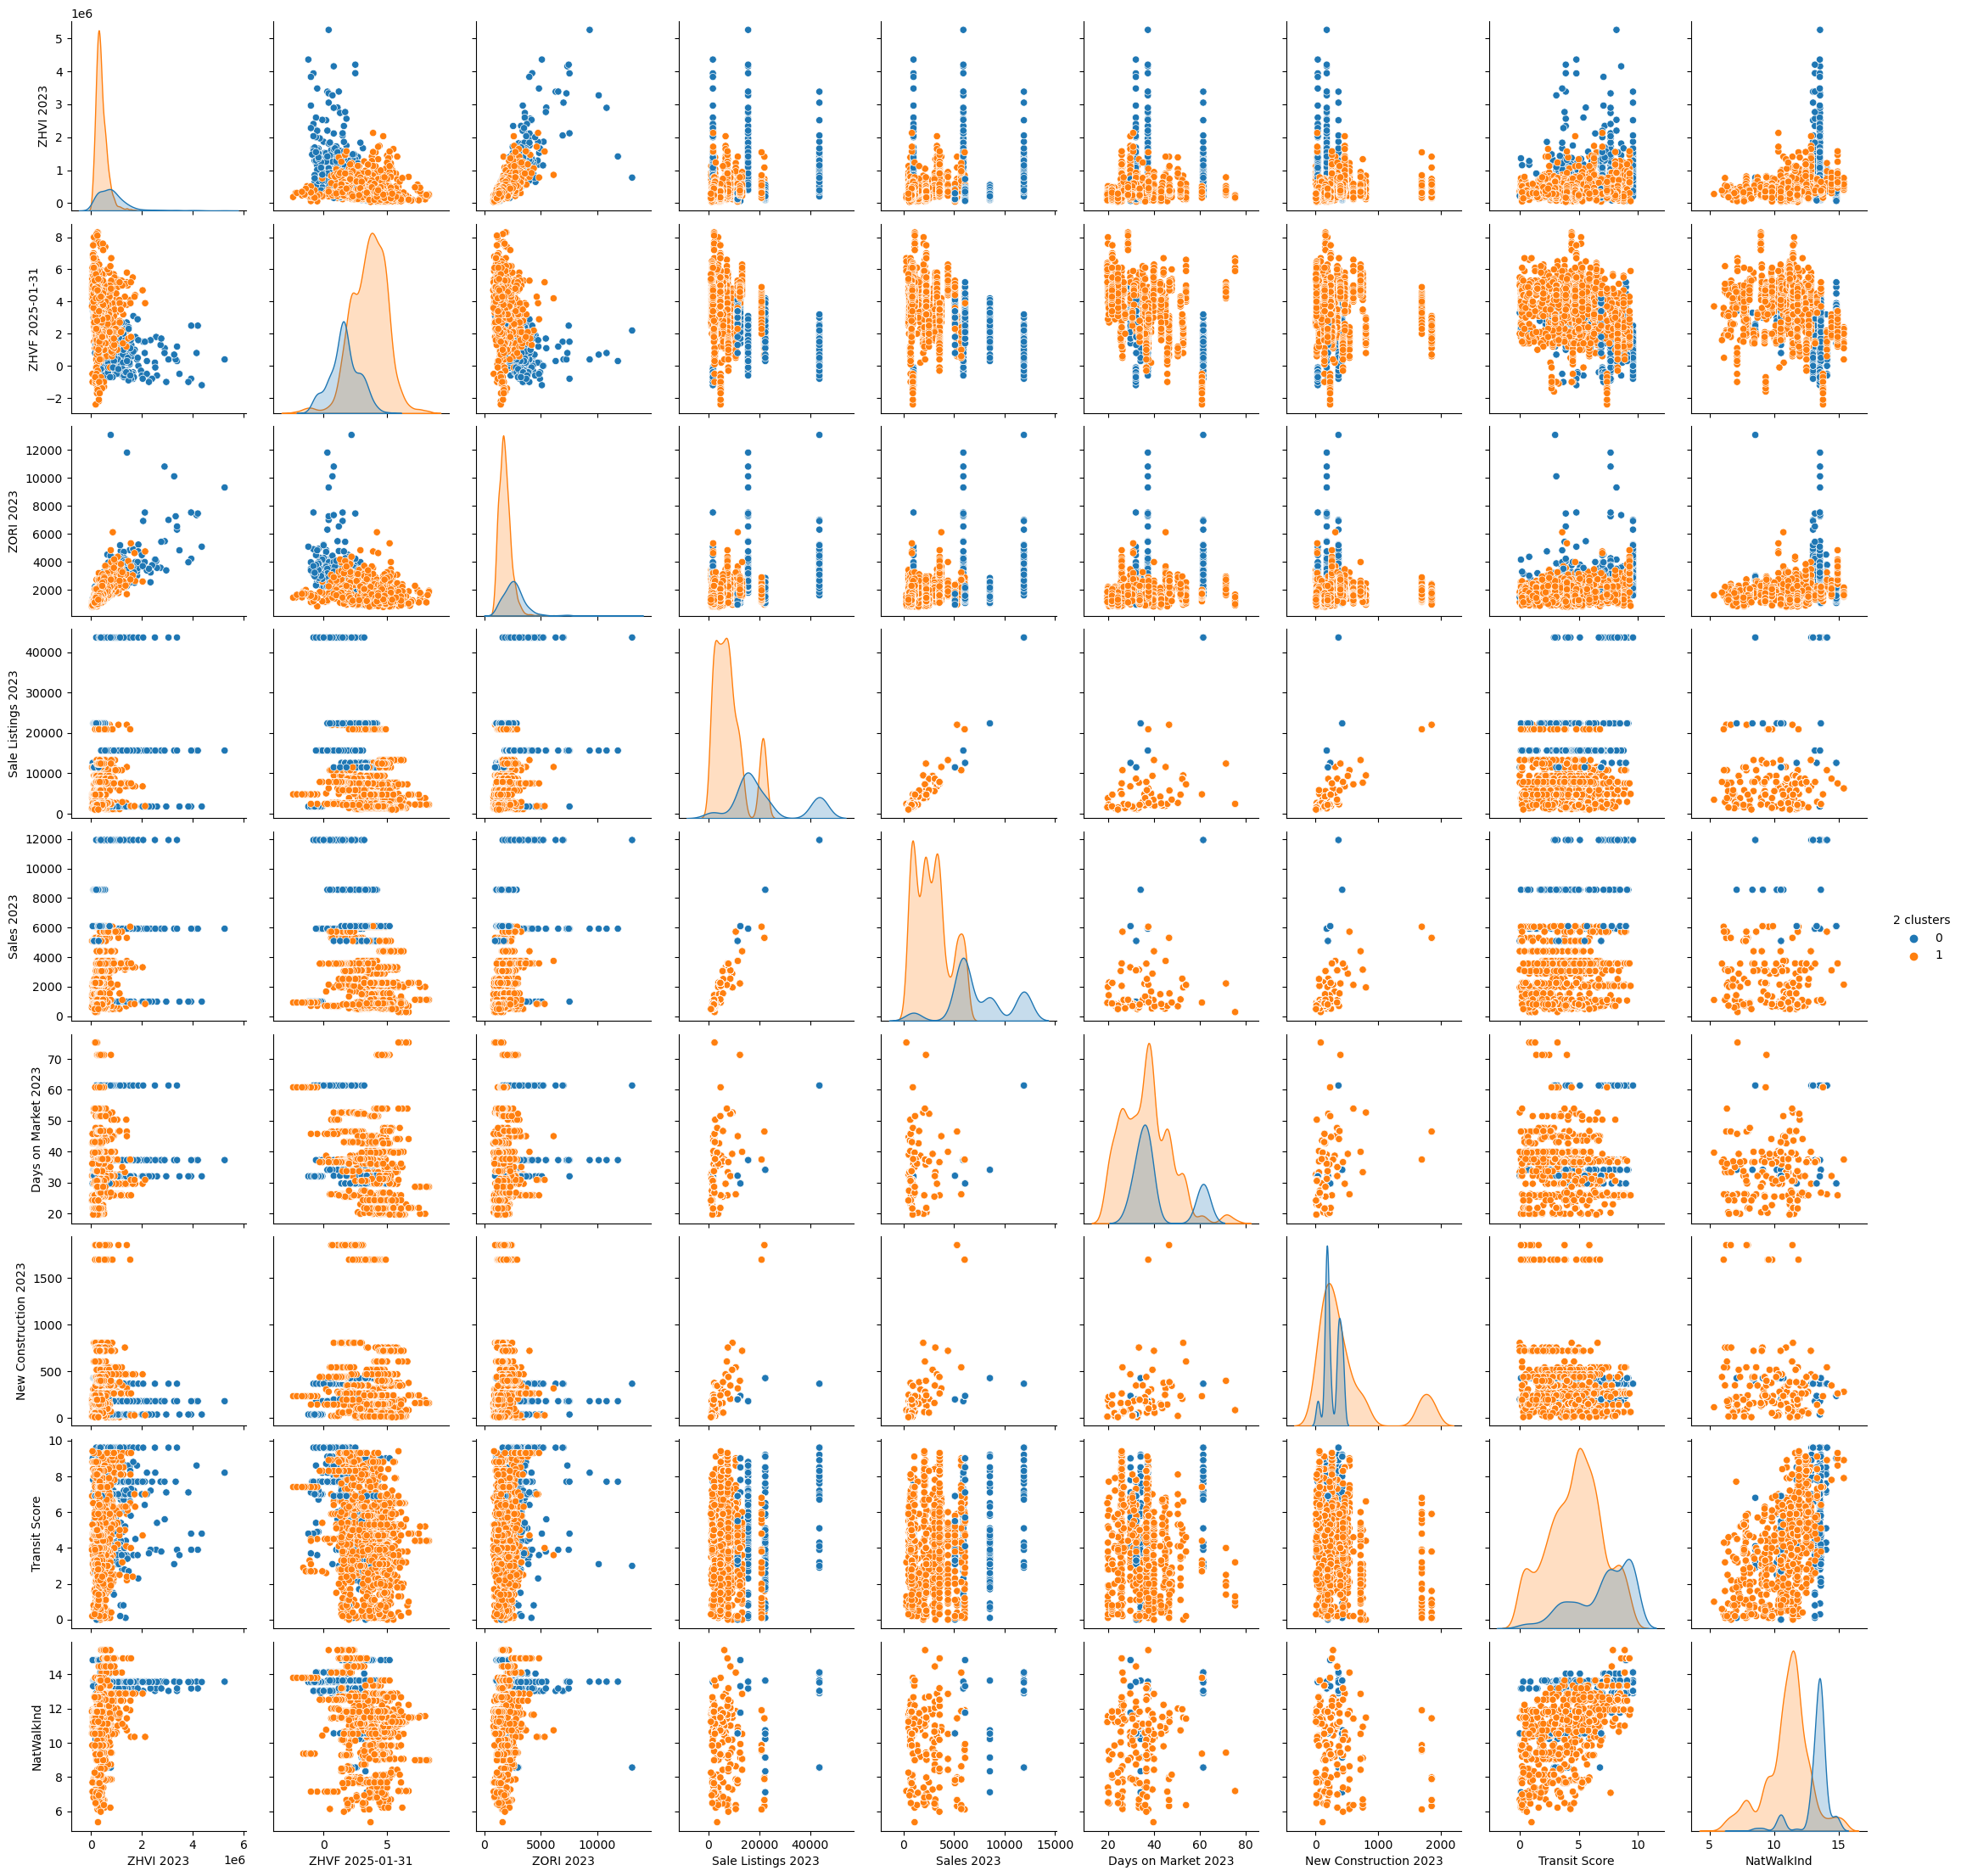

In [35]:
sns.pairplot(data=df[['ZHVI 2023', 'ZHVF 2025-01-31', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023',
                    'New Construction 2023', 'Transit Score', 'NatWalkInd', '2 clusters']], hue='2 clusters')

/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


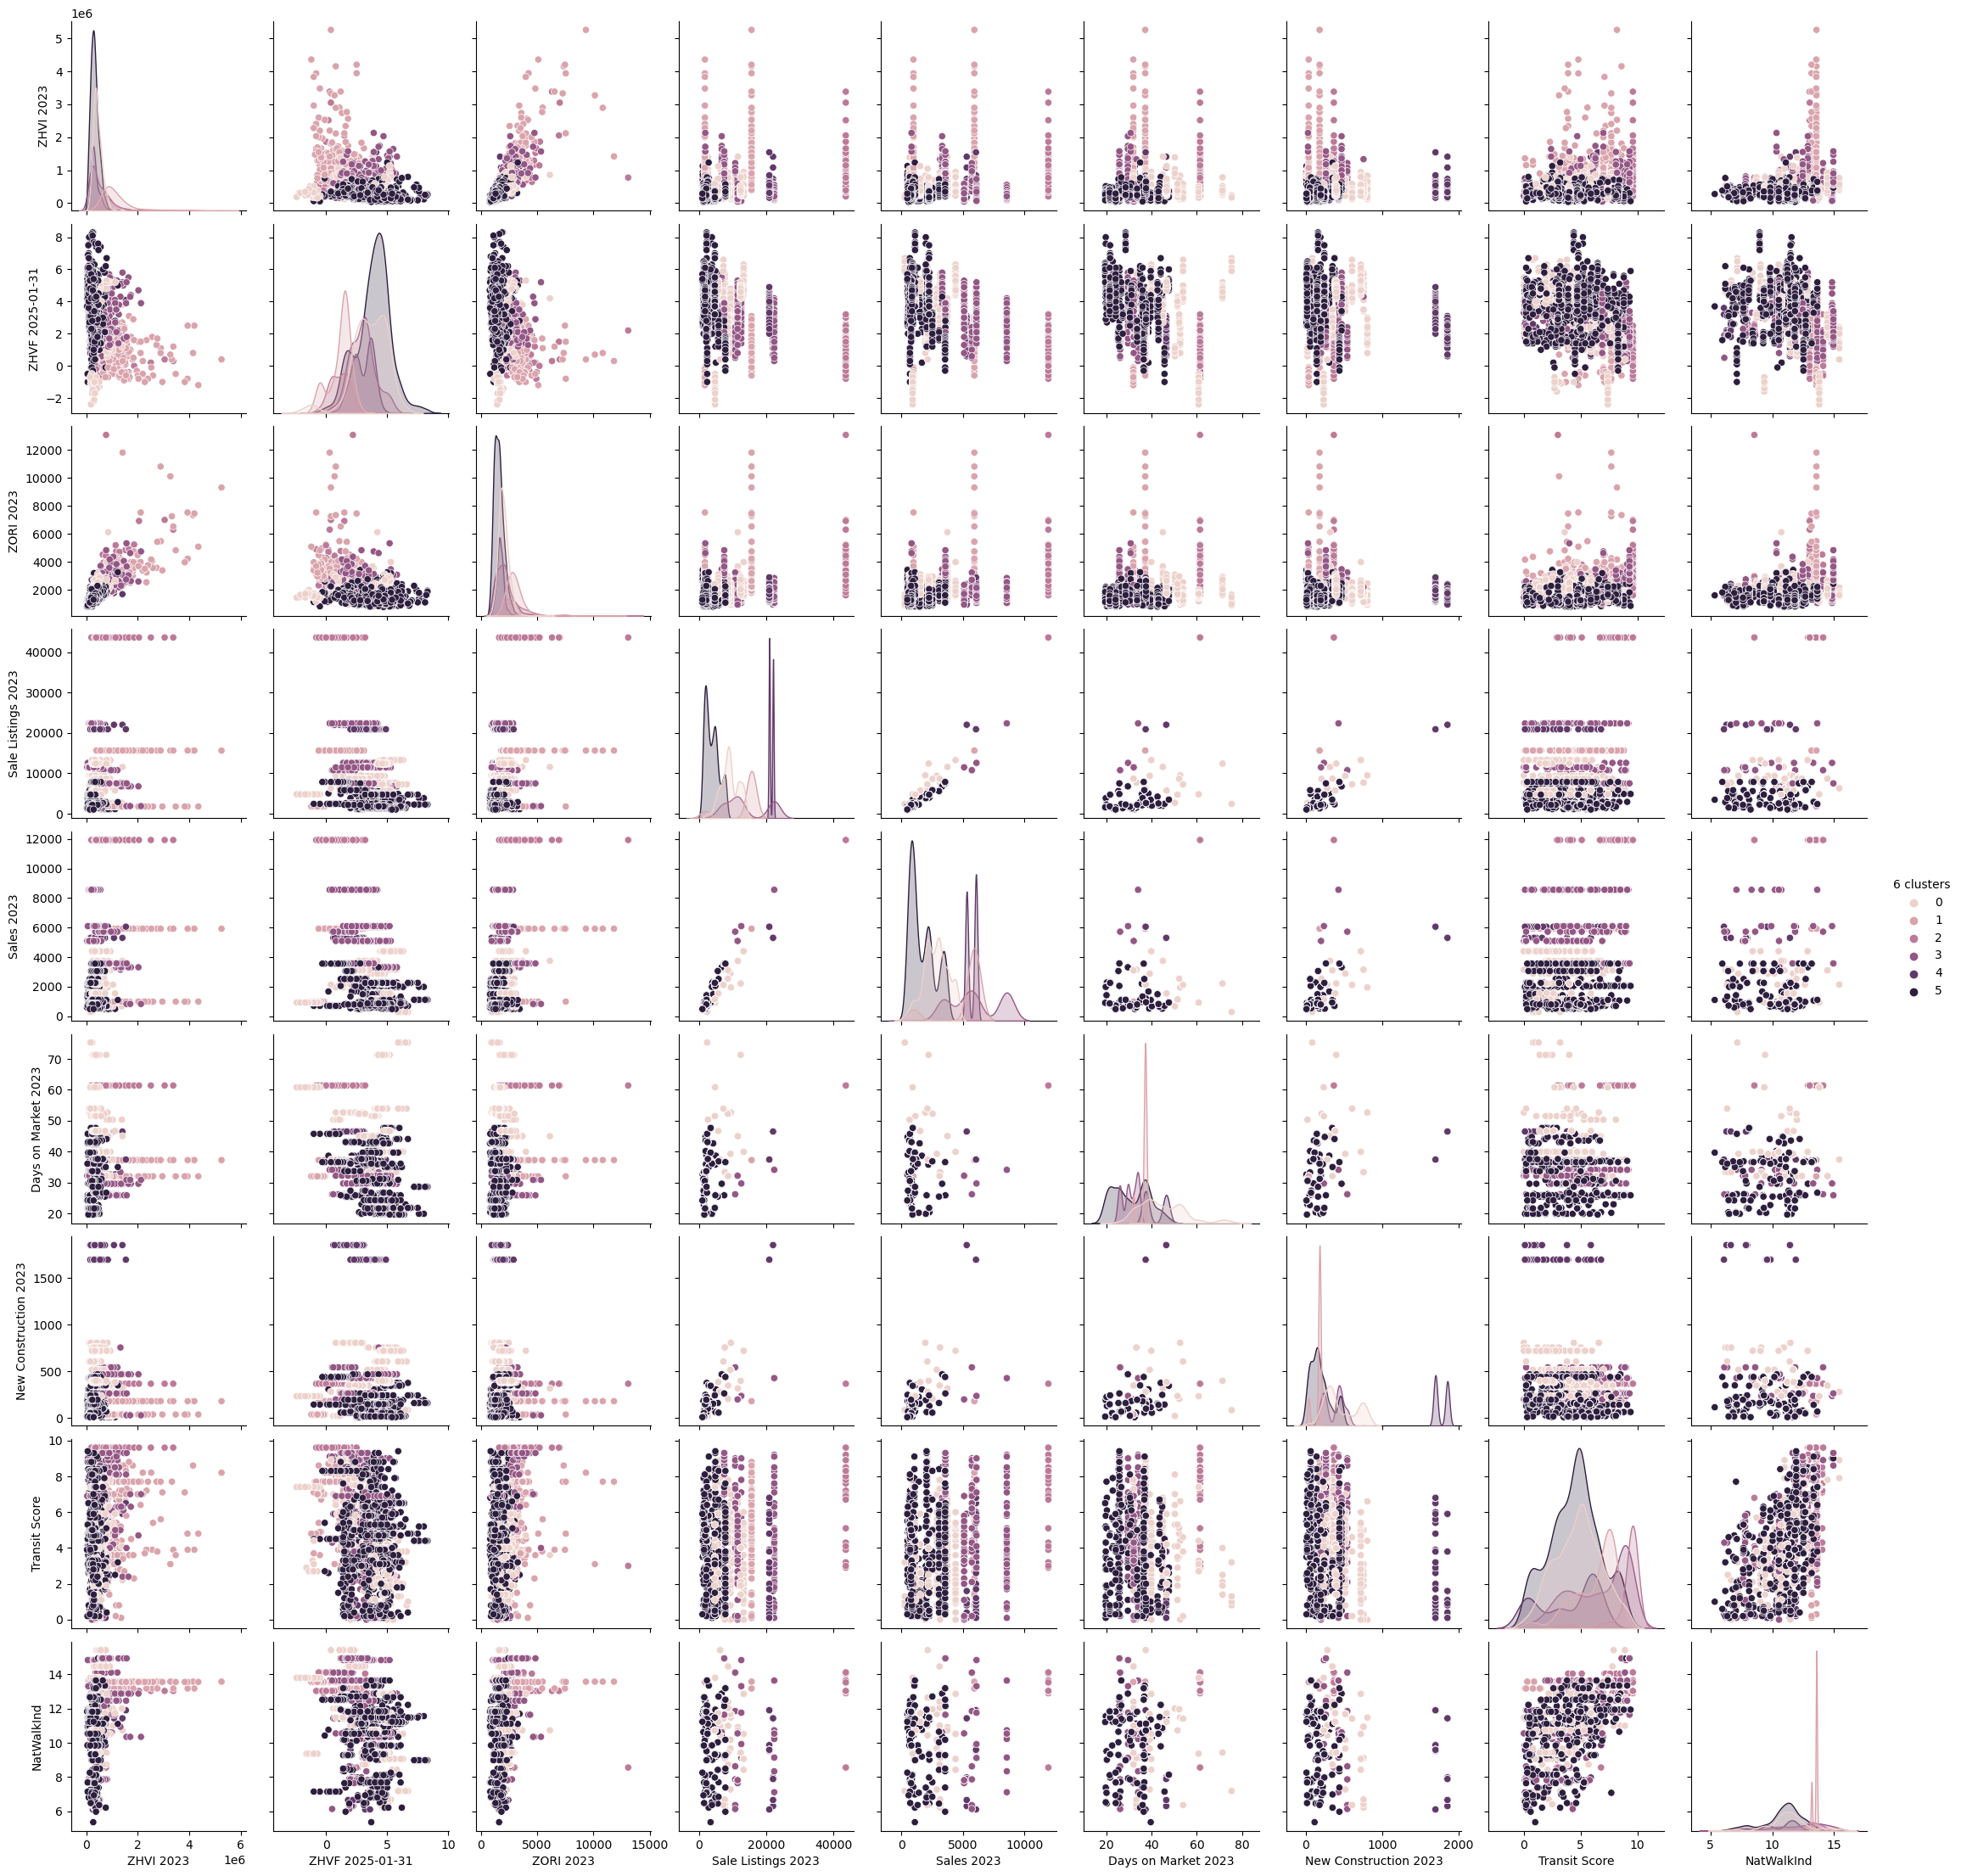

In [36]:
sns.pairplot(data=df[['ZHVI 2023', 'ZHVF 2025-01-31', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023',
                    'New Construction 2023', 'Transit Score', 'NatWalkInd', '6 clusters']], hue='6 clusters')

/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


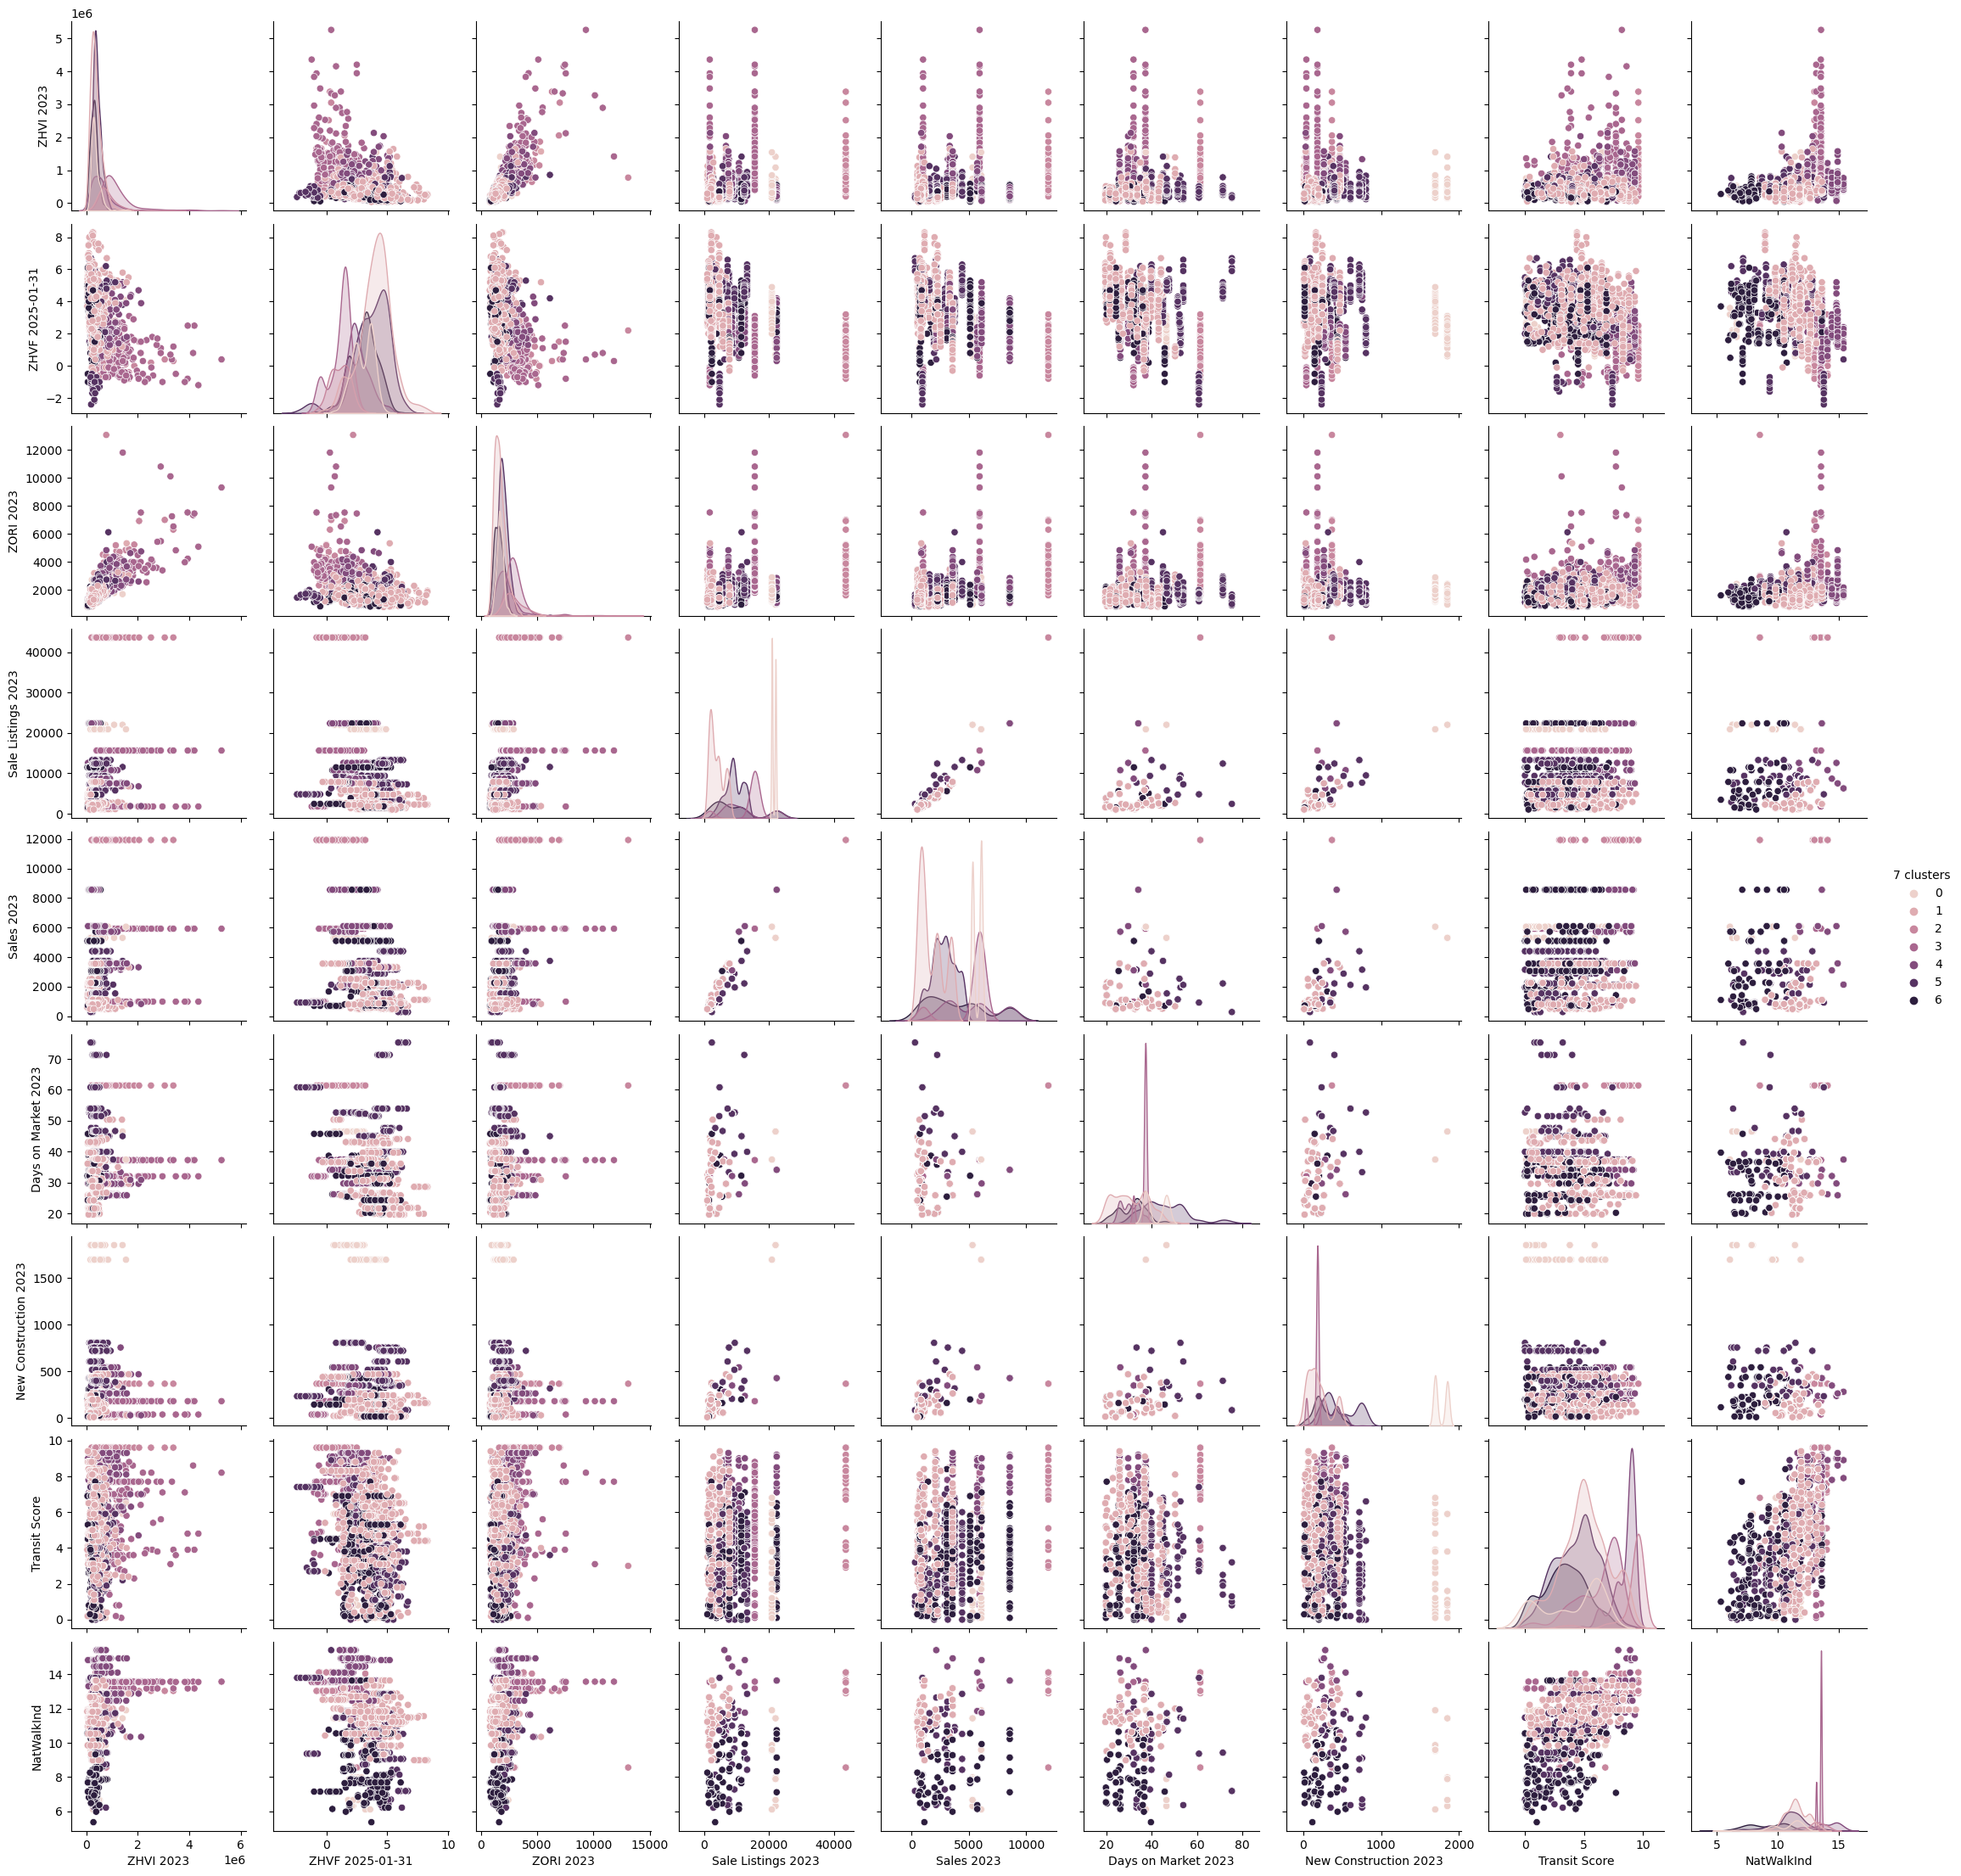

In [37]:
sns.pairplot(data=df[['ZHVI 2023', 'ZHVF 2025-01-31', 'ZORI 2023', 'Sale Listings 2023', 'Sales 2023', 'Days on Market 2023',
                    'New Construction 2023', 'Transit Score', 'NatWalkInd', '7 clusters']], hue='7 clusters')

In [51]:
for x in range(2, 10):
    cluster, counts = np.unique(labels[x-2], return_counts=True)
    df = pd.DataFrame(list(zip(cluster, counts)), columns=['Cluster', 'Count'])
    df = df.set_index('Cluster')
    print(df)
    print('='*20)

         Count
Cluster       
0          692
1         1991
         Count
Cluster       
0         1786
1          736
2          161
         Count
Cluster       
0          473
1          256
2          447
3         1507
         Count
Cluster       
0          161
1          464
2         1038
3          764
4          256
         Count
Cluster       
0          629
1          330
2          161
3          400
4          256
5          907
         Count
Cluster       
0          256
1          743
2          161
3          330
4          259
5          575
6          359
         Count
Cluster       
0          461
1          161
2          330
3          256
4          184
5          575
6          311
7          405
         Count
Cluster       
0          575
1          167
2          436
3          126
4          535
5          161
6          130
7          223
8          330


In [52]:
base_df

array([[-0.10124695, -0.23306644, -0.1991504 , ...,  3.02346892,
        -2.01581376, -1.94824879],
       [-0.56153761, -0.29660848, -0.26028355, ...,  3.02346892,
        -2.01581376, -0.09128515],
       [-0.57816762, -0.36015052, -0.20854098, ...,  3.02346892,
         0.24003964, -0.09128515],
       ...,
       [-0.75302885,  1.67319486, -0.67325763, ..., -0.90653149,
         0.24003964, -0.19901683],
       [-0.86734217,  1.41902669, -1.07797001, ..., -0.90653149,
         0.24003964, -0.19901683],
       [-0.53438984,  1.48256873, -0.85040622, ..., -0.90653149,
         0.24003964, -0.19901683]])

## K-means

In [ ]:
km_labels = []

for x in range(2, 10):
    km = KMeans(n_clusters=x, random_state=100)
    clusters = km.fit_predict(base_df)
    